<a href="https://colab.research.google.com/github/krishnapriyaveluri/HistoriDecode---Language-Evolution-Decryption/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Define paths
dataset_path = '/content/drive/MyDrive/dataset'

# Load dataset using Keras utility
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',           # Labels inferred from folder names
    label_mode='categorical',    # Categorical labels for each letter
    batch_size=32,
    image_size=(224, 224),       # Resize images to match model input
    color_mode='grayscale'       # Assuming the images are grayscale
)

# Normalize pixel values (optional)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Applying normalization to the dataset
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))


Found 303 files belonging to 23 classes.


In [ ]:
# Calculate the number of samples in the dataset
dataset_size = tf.data.experimental.cardinality(train_data).numpy()

# Set the split size for validation
val_size = int(0.2 * dataset_size)  # 20% validation

# Create the validation and training splits
val_data = train_data.take(val_size)  # Take first 20% for validation
train_data = train_data.skip(val_size)  # Take the rest 80% for training

#CRNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, LSTM, Dense, GRU, Dropout
from tensorflow.keras.models import Sequential

# Input image size (height, width)
img_height, img_width = 224, 224
num_classes = 23  # Since there are 23 modern letters

# Build the CRNN Model
def build_crnn(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers (Feature extraction)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  # Prevent overfitting

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Reshape for the recurrent layer
    model.add(Reshape((-1, 128)))  # Flatten spatial dimensions while keeping depth

    # Recurrent layers (LSTM/GRU for sequence-like processing)
    model.add(GRU(128, return_sequences=False))  # GRU layer
    model.add(Dropout(0.5))

    # Fully connected layers (Classification)
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax for classification

    return model

# Instantiate the model
input_shape = (img_height, img_width, 1)  # Assuming grayscale images
crnn_model = build_crnn(input_shape, num_classes)

# Compile the model
crnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
crnn_model.summary()

# Fit the model (assuming the dataset is pre-loaded as 'train_data' and 'val_data')
epochs = 10
history = crnn_model.fit(train_data, epochs=epochs, validation_data=val_data)

# Save the trained model (optional)
crnn_model.save("crnn_model.h5")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 676, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 23)                  │           2,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211,223 (825.09 KB)

 Trainable params: 211,223 (825.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 78s 7s/step - accuracy: 0.0246 - loss: 3.1520 - val_accuracy: 0.0156 - val_loss: 3.1419
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.0413 - loss: 3.1258 - val_accuracy: 0.0156 - val_loss: 3.1385
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.0381 - loss: 3.1427 - val_accuracy: 0.0469 - val_loss: 3.1246
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.0833 - loss: 3.1168 - val_accuracy: 0.0781 - val_loss: 3.1225
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.0522 - loss: 3.1151 - val_accuracy: 0.0469 - val_loss: 3.1248
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.0373 - loss: 3.1285 - val_accuracy: 0.0625 - val_loss: 3.1161
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.0427 - loss: 3.1107 - val_accuracy: 0.0469 - val_loss: 3.1206
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.0484 - loss: 3.1039 - val_accuracy: 0.0469 - val_loss: 3.1177
Epoch 9/

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained CRNN model
crnn_model = tf.keras.models.load_model("crnn_model.h5")
# Function to preprocess input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224), color_mode='grayscale')  # Resize to 224x224
    img = image.img_to_array(img)  # Convert to array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize pixel values (if not already done)
    return img
# List of modern letters (Assuming classes are indexed in this order)
modern_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W']

# Function to predict the modern letter
def predict_modern_letter(img_path):
    img = preprocess_image(img_path)
    prediction = crnn_model.predict(img)
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    predicted_letter = modern_letters[predicted_class]  # Map index to the corresponding letter
    return predicted_letter

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
Predicted Modern Letter: M


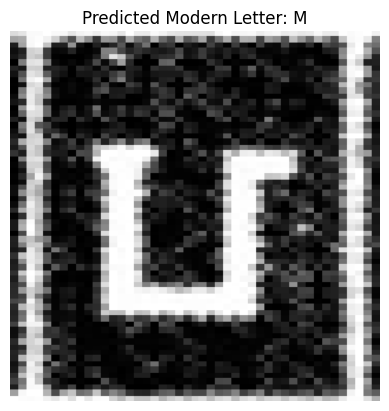

In [ ]:
# Input image path (Old version letter image)
img_path = '/content/drive/MyDrive/dataset/letter_T/old_letter_T_variant3.png'

# Predict and display the result
predicted_letter = predict_modern_letter(img_path)
print(f"Predicted Modern Letter: {predicted_letter}")

# Display the image alongside the prediction
img = image.load_img(img_path, target_size=(224, 224), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Modern Letter: {predicted_letter}")
plt.axis('off')
plt.show()


#ViT Transformers Model

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

In [ ]:
import os
import numpy as np
import torch
from PIL import Image
from transformers import ViTFeatureExtractor, ViTForImageClassification
import matplotlib.pyplot as plt

# List of letter folder names (for classification)
letter_folders = ['letter_A', 'letter_B', 'letter_C', 'letter_D', 'letter_E', 'letter_F', 'letter_G', 'letter_H',
                  'letter_I', 'letter_J', 'letter_K', 'letter_L', 'letter_M', 'letter_N', 'letter_O', 'letter_P',
                  'letter_Q', 'letter_R', 'letter_S', 'letter_T', 'letter_U', 'letter_V', 'letter_W']

# Path to the dataset folder
dataset_path = "/content/drive/MyDrive/dataset"

# Load the Vision Transformer model from Hugging Face and the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=len(letter_folders))

# Set the model to evaluation mode
vit_model.eval()

# Function to preprocess an image (for PyTorch)
def preprocess_image_vit(img_path):
    img = Image.open(img_path).convert("RGB")  # Open image and convert to RGB
    inputs = feature_extractor(images=img, return_tensors="pt")  # Preprocess using ViT feature extractor
    return inputs['pixel_values']  # Return pixel values

# Function to predict the modern letter based on the old letter input image
def predict_modern_letter_vit(img_path, model):
    img = preprocess_image_vit(img_path)
    with torch.no_grad():  # Disable gradient calculation for inference
        outputs = model(img)  # Get model outputs
    predicted_class = torch.argmax(outputs.logits, dim=-1).item()  # Get the index of the highest probability
    predicted_folder = letter_folders[predicted_class]  # Map index to the corresponding folder
    return predicted_folder

# Function to display the modern letter image
def display_modern_image(predicted_folder):
    # Path to the folder containing the predicted letter's images
    letter_folder = os.path.join(dataset_path, predicted_folder)

    # Assuming there's only one modern letter image in each folder
    modern_image_path = os.path.join(letter_folder, f"modern_{predicted_folder}.png")

    # Load and display the modern letter image
    modern_image = Image.open(modern_image_path).convert("L")

    plt.imshow(modern_image, cmap='gray')
    plt.title(f"Predicted Modern Letter: {predicted_folder[-1]}")
    plt.axis('off')
    plt.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Modern Letter Folder: letter_D


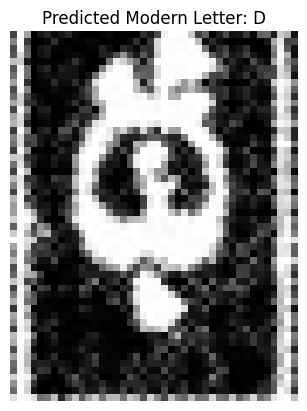

In [ ]:
# Test the model with a new image (old letter variant)
img_path = '/content/drive/MyDrive/dataset/letter_I/old_letter_I_variant7.png'
predicted_folder = predict_modern_letter_vit(img_path, vit_model)
print(f"Predicted Modern Letter Folder: {predicted_folder}")

# Display the modern letter image
display_modern_image(predicted_folder)

#Hybrid Model (CRNN+ViT)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from transformers import ViTFeatureExtractor, TFAutoModelForImageClassification

# Define the CRNN model (from the previous code)
def build_crnn(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional layers
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Reshape and LSTM layers
    x = layers.Reshape((-1, x.shape[-1]))(x)  # Reshape for LSTM input
    x = layers.LSTM(128, return_sequences=False)(x)

    # Output layer (not final classification layer, features for concatenation)
    crnn_output = layers.Dense(128, activation='relu')(x)

    return Model(inputs, crnn_output, name="CRNN")

# Load Vision Transformer (ViT) model from Hugging Face
def build_vit_model(num_classes):
    vit_model = TFAutoModelForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=num_classes)
    return vit_model

# Hybrid Model combining CRNN and ViT
def build_hybrid_model(input_shape, num_classes):
    # CRNN Branch
    crnn_model = build_crnn(input_shape, num_classes)
    crnn_input = crnn_model.input
    crnn_features = crnn_model.output  # Features from CRNN

    # ViT Branch
    vit_input = tf.keras.Input(shape=input_shape)

    # Preprocessing for ViT (using TensorFlow ops)
    def vit_preprocess(image):
        """Preprocess the image using resizing and normalization."""
        image = tf.image.resize(image, (224, 224))
        image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
        return image

    vit_preprocessed = layers.Lambda(lambda x: vit_preprocess(x), output_shape=(224, 224, 3))(vit_input)

    # Load ViT model for extracting features
    vit_model = build_vit_model(num_classes)
    vit_features = vit_model(vit_preprocessed).logits  # Extract ViT features

    # Concatenate CRNN and ViT features
    combined_features = layers.concatenate([crnn_features, vit_features])

    # Fully connected layer for final classification
    x = layers.Dense(256, activation='relu')(combined_features)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Create the hybrid model
    hybrid_model = Model(inputs=[crnn_input, vit_input], outputs=output, name="Hybrid_CRNN_ViT")

    return hybrid_model

# Define the input shape and number of classes
input_shape = (224, 224, 3)  # Input image shape (for both CRNN and ViT)
num_classes = 23  # Number of letter classes

# Build the hybrid model
hybrid_model = build_hybrid_model(input_shape, num_classes)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
hybrid_model.summary()

# Train the hybrid model with the same dataset
# Assuming you have the train_generator and validation_generator ready
history = hybrid_model.fit(
    [train_generator, train_generator],  # CRNN and ViT use the same input data
    validation_data=([validation_generator, validation_generator]),
    epochs=10
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Exception encountered when calling layer 'tf_vi_t_for_image_classification_1' (type TFViTForImageClassification).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for pixel_values.

Call arguments received by layer 'tf_vi_t_for_image_classification_1' (type TFViTForImageClassification):
  • pixel_values=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_1109>
  • head_mask=None
  • output_attentions=None
  • output_hidden_states=None
  • interpolate_pos_encoding=None
  • return_dict=None
  • labels=None
  • training=False